## Primary Imports

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
cab_data=pd.read_csv("Cab_Data.csv")
city=pd.read_csv("City.csv")
customer_id=pd.read_csv("Customer_ID.csv")
transaction_id=pd.read_csv("Transaction_ID.csv")

## Preliminary Data Cleaning and Exploration

In [3]:
def data_explore(df):
    display(df.info())
    display(df.describe())
    print('\n')
    print("First 10 rows")
    display(df.head(10))

In [4]:
data_explore(cab_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


None

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000




First 10 rows


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [5]:
data_explore(city)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


None

,City,Population,Users
count,20,20,20
unique,20,20,20
top,ORANGE COUNTY,"1,339,155","24,701"
freq,1,1,1




First 10 rows


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
data_explore(customer_id)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000




First 10 rows


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [7]:
data_explore(transaction_id)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


None

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000




First 10 rows


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


It seems that cab_data is the one that deserves the most focus considering it records the details of every single ride. However, the "Date of Travel" column shows sequential integers. The time period that this dataset is meant to cover is from 1/1/2016 to 12/31/2018. This column needs to be reformatted into datetime objects in order to display the proper dates and be utilized for further analysis. Considering the very first date starts off as 42371, I will subtract all the dates by that number and then repopulate the dates column with the proper range of dates, starting from 01/31/2016.

In [8]:
cab_data=cab_data.sort_values(by=["Date of Travel"])
cab_data["Date of Travel"]=cab_data["Date of Travel"]-42371
from datetime import date, timedelta
start_date=date(2016,1,1)
def dates(x):
    true_date=start_date+timedelta(days=x)
    return true_date

cab_data["Date of Travel"]=cab_data["Date of Travel"].apply(dates)
cab_data["Date of Travel"]=pd.to_datetime(cab_data["Date of Travel"])
cab_data["Weekday"]=cab_data["Date of Travel"].dt.day_name()


Additonal features will have to be added. First off is how much profit is made from each trip.

In [9]:
cab_data["Profit"]=cab_data["Price Charged"]-cab_data["Cost of Trip"]

In [10]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Weekday,Profit
1030,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,Friday,66.6760
489,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,Friday,164.9960
484,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,Friday,195.7548
850,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,Friday,796.6140
160,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,Friday,122.0660
...,...,...,...,...,...,...,...,...,...
355489,10435011,2018-12-30,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,Sunday,18.8980
354114,10433309,2018-12-30,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,Sunday,8.1600
356365,10435915,2018-12-30,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,Sunday,-2.8388
359162,10439845,2018-12-30,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,Sunday,151.8488


## Research Questions

The ultimate goal of this analysis is to figure out which company to invest in. There are many areas to investigate. 

In [11]:
color=['pink','yellow']

### Seasonality Across Years

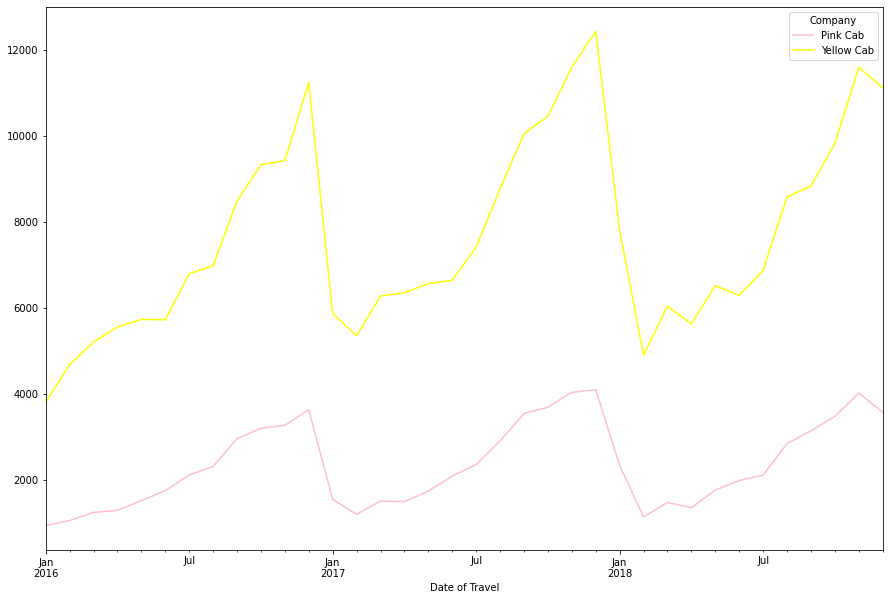

In [12]:
seasonality=cab_data.groupby(by="Company")\
            .resample("M",on="Date of Travel")\
            .size()\
            .T\
            .plot(figsize=(15,10),color=color)

Based on this graph, both companies suffer from the same dips around the beginning of the year and peaks near the holiday time at the end of the year. However, the number of rides of the Yellow Cab company completely dwarf that of the Pink Cab company.

### Distribution of Customers by Age

In [13]:
main_table=cab_data.merge(transaction_id,on="Transaction ID",how="inner")\
            .merge(customer_id,on="Customer ID",how="inner")
main_table["Age Category"]=pd.cut(customer_id["Age"],\
                                   bins=[18,30,45,65],\
                                   labels=["18-30","31-45","46-65"])

A few tables have to be joined together in order to properly match customer age to customer ids to the actual rides in the the cab_data dataframe. 

<AxesSubplot:title={'center':'Pink Cab'}>

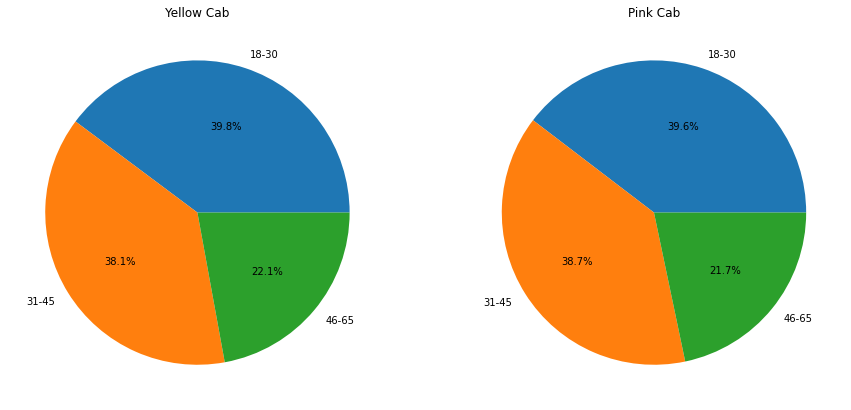

In [14]:
plt.subplot(1,2,1)
main_table[main_table["Company"]=="Yellow Cab"]\
.groupby(by="Age Category")\
.size()\
.plot(kind="pie",figsize=(15,15),label='',title="Yellow Cab",autopct="%1.1f%%")

plt.subplot(1,2,2)
main_table[main_table["Company"]=="Pink Cab"]\
.groupby(by="Age Category")\
.size()\
.plot(kind="pie",figsize=(15,15),label='',title="Pink Cab",autopct="%1.1f%%")

It seems that both of these companies have similar age distributions and neither comes out as more favorable from this analysis. 

### Profits by Location

Text(0.5, 1.0, 'Profit USD in Millions')

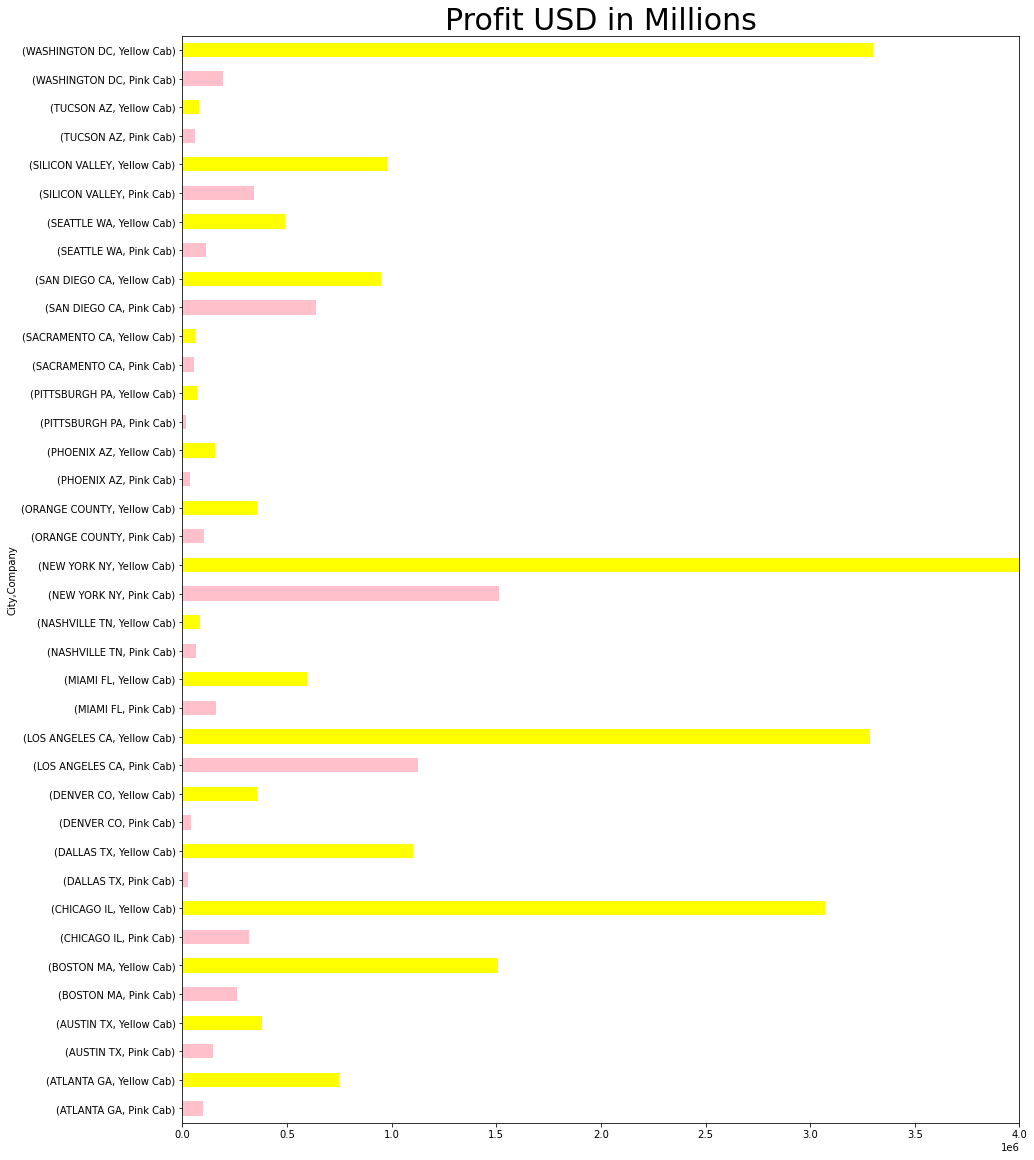

In [15]:
cab_data.groupby(by=["City","Company"])["Profit"]\
.sum()\
.plot(kind='barh',figsize=(15,20),color=color,xlim=[0,4000000])
plt.title("Profit USD in Millions",fontsize=30)

It seems that the Yellow Cab company beats out the Pink Cab company in every single city. In some cities, it is by a bit while in others, the Yellow Cab company has multiple times the amount of profits as the Pink Cab company. 

### Profits Across The Week

Text(0.5, 1.0, 'Profit USD in Millions')

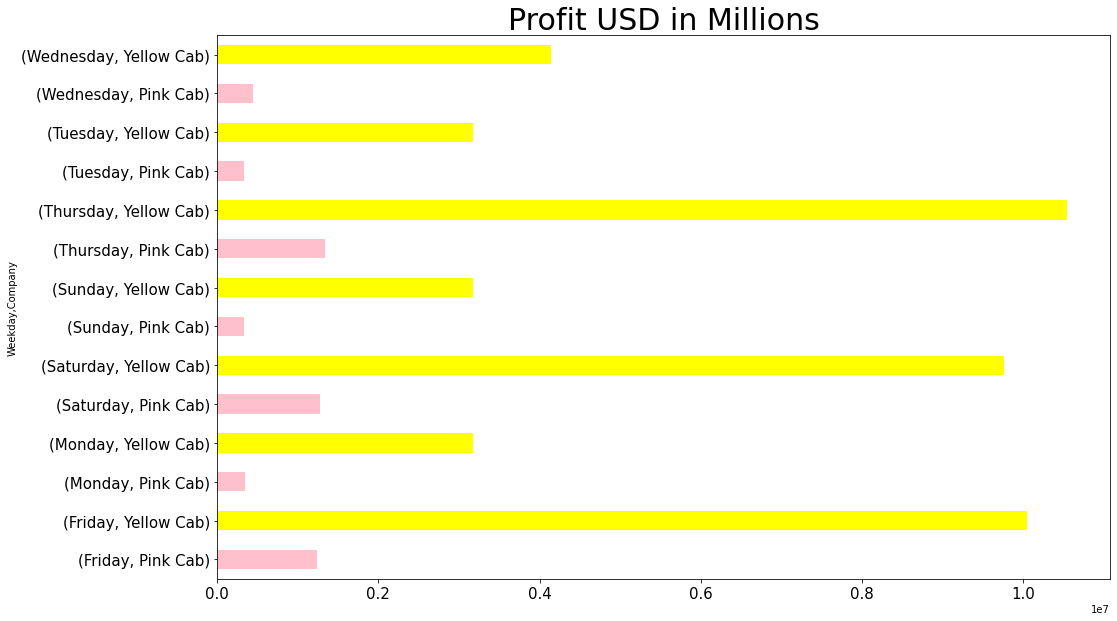

In [53]:
cab_data.groupby(by=["Weekday","Company"])["Profit"]\
.sum()\
.plot(kind='barh',figsize=(16,10),color=color,fontsize=15)
plt.title("Profit USD in Millions",fontsize=30)

Again, the Yellow Cab company consistently beats the Pink Cab company by many times the profit across various days. It seems that the most cabs are called on Thursdays, Fridays and Saturdays. A possible reason for this could be that people want to travel at the end of the work week.

### Profits by Company

Text(0.5, 1.0, 'Profit USD in Millions')

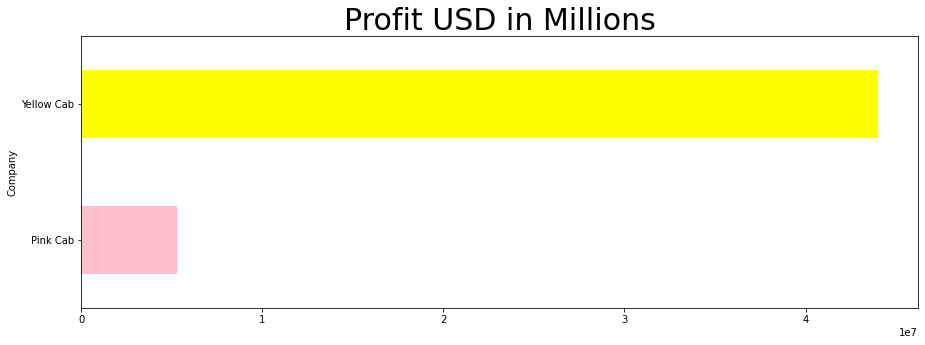

In [26]:
cab_data.groupby(by=["Company"])["Profit"]\
.sum()\
.plot(kind='barh',figsize=(15,5),color=color)
plt.title("Profit USD in Millions",fontsize=30)

Overall, we can see that the Yellow Cab company has 10x the profit of the Pink Cab company.

## Conclusion